In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("imdb_top_1000.csv")

In [3]:
titles = df['Series_Title'].unique()
len(titles)

999

In [4]:
file_path = 'film_titles.txt'
with open(file_path, 'w') as f:
    for title in titles:
        f.write(title + '\n')


In [5]:
top = df.sort_values(by="IMDB_Rating", ascending=False)

print(top)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
912  https://m.media-amazon.com/images/M/MV5BMTU5MD...   
911  https://m.media-amazon.com/images/M/MV5BYmFmNj...   
910  https://m.media-amazon.com/images/M/MV5BMjAxOT...   
909  https://m.media-amazon.com/images/M/MV5BMjI2OD...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II  

In [6]:
movie_row = df[df['Series_Title'].str.contains("pianist", case=False, na=False)]
movie_row.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
38,https://m.media-amazon.com/images/M/MV5BOWRiZD...,The Pianist,2002,R,150 min,"Biography, Drama, Music",8.5,A Polish Jewish musician struggles to survive ...,85.0,Roman Polanski,Adrien Brody,Thomas Kretschmann,Frank Finlay,Emilia Fox,729603,"32,572,577"
249,https://m.media-amazon.com/images/M/MV5BMzIwOT...,La leggenda del pianista sull'oceano,1998,U,169 min,"Drama, Music, Romance",8.1,"A baby boy, discovered in 1900 on an ocean lin...",58.0,Giuseppe Tornatore,Tim Roth,Pruitt Taylor Vince,Mélanie Thierry,Bill Nunn,59020,"259,127"


In [31]:
# Split dei generi separati da virgola, e unione di tutti i generi
all_genres = df['Genre'].str.split(', ').explode().unique()

print(all_genres)
print(len(all_genres))

['Drama' 'Crime' 'Action' 'Adventure' 'Biography' 'History' 'Sci-Fi'
 'Romance' 'Western' 'Fantasy' 'Comedy' 'Thriller' 'Animation' 'Family'
 'War' 'Mystery' 'Music' 'Horror' 'Musical' 'Film-Noir' 'Sport']
21


In [9]:
print(df.dtypes)

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [10]:
# Rimuovi le virgole dalla colonna "Gross" e convertila in float

movies_df = df
movies_df["Gross"] = movies_df["Gross"].replace({',': ''}, regex=True)  # Rimuove le virgole
movies_df["Gross"] = pd.to_numeric(movies_df["Gross"], errors='coerce')  # Converte in float, impostando a NaN se ci sono errori

# Verifica che la colonna "Gross" sia stata convertita correttamente
print(movies_df["Gross"].dtype)
print(movies_df["Gross"].head())


float64
0     28341469.0
1    134966411.0
2    534858444.0
3     57300000.0
4      4360000.0
Name: Gross, dtype: float64


In [3]:
import pandas as pd

# Supponiamo che il dataframe sia già caricato come df

# Convertiamo la colonna 'Released_Year' in numerico, gestendo eventuali errori
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Film più vecchio
film_piu_vecchio = df.loc[df['Released_Year'].idxmin()]

# Film più recente
film_piu_recente = df.loc[df['Released_Year'].idxmax()]

print("Film più vecchio:\n", film_piu_vecchio[['Series_Title', 'Released_Year']])
print("\nFilm più recente:\n", film_piu_recente[['Series_Title', 'Released_Year']])


Film più vecchio:
 Series_Title     Das Cabinet des Dr. Caligari
Released_Year                          1920.0
Name: 321, dtype: object

Film più recente:
 Series_Title     Hamilton
Released_Year      2020.0
Name: 18, dtype: object


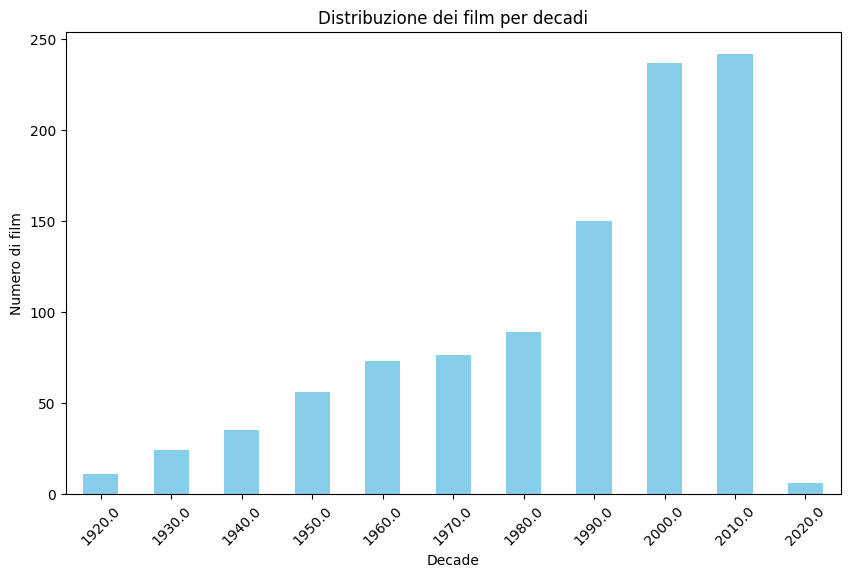

In [24]:
df['Decade'] = (df['Released_Year'] // 10) * 10

# Calcoliamo la distribuzione per decade
decade_distribution = df['Decade'].value_counts().sort_index()

# Plot della distribuzione per decadi
plt.figure(figsize=(10, 6))
decade_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuzione dei film per decadi')
plt.xlabel('Decade')
plt.ylabel('Numero di film')
plt.xticks(rotation=45)
plt.show()




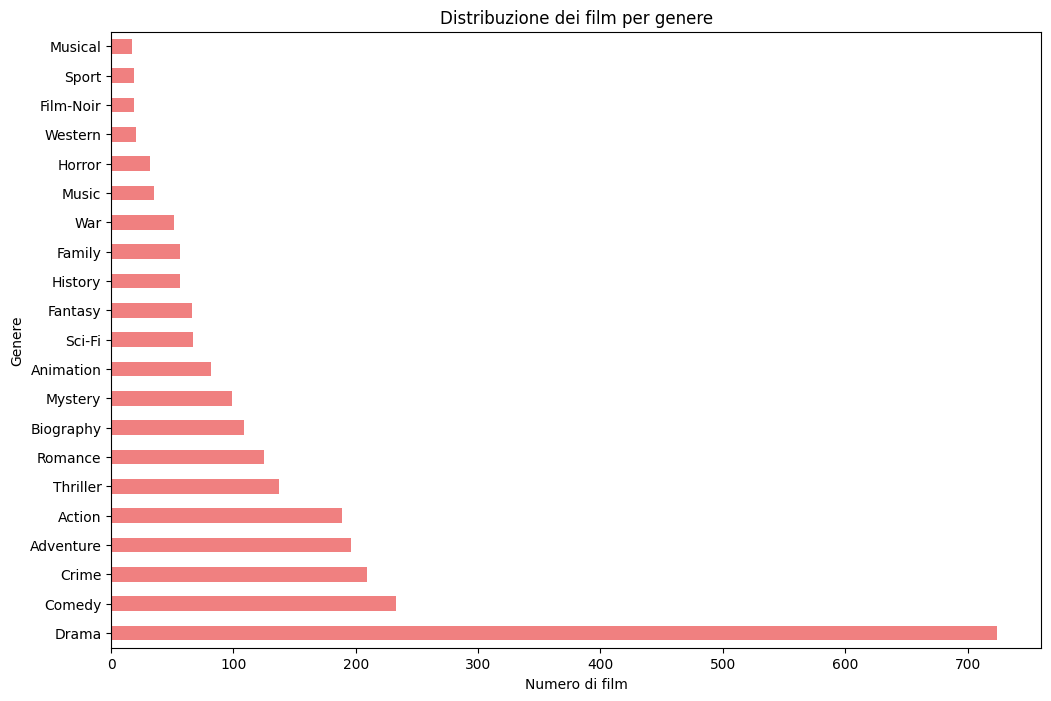

In [30]:
# Creiamo una lista di generi separati da virgola
# Splittiamo, esplodiamo e rimuoviamo eventuali duplicati (per ogni film)
genre_distribution = df['Genre'].str.split(',').explode().str.strip().value_counts()

# Plot della distribuzione per genere
plt.figure(figsize=(12, 8))
genre_distribution.plot(kind='barh', color='lightcoral')
plt.title('Distribuzione dei film per genere')
plt.xlabel('Numero di film')
plt.ylabel('Genere')
plt.show()


In [29]:
# Convertiamo la colonna 'Released_Year' in numerico (gestendo le stringhe)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Troviamo l'anno di produzione del primo e dell'ultimo film
first_film_year = df['Released_Year'].min()
last_film_year = df['Released_Year'].max()

print(f"Anno di produzione del primo film nel dataset: {first_film_year}")
print(f"Anno di produzione dell'ultimo film nel dataset: {last_film_year}")


Anno di produzione del primo film nel dataset: 1920.0
Anno di produzione dell'ultimo film nel dataset: 2020.0


In [ ]:
actor = df[['Star1', 'Star2', 'Star3', 'Star4']].stack().unique()
# Filtriamo le stringhe con più di due elementi
# Filtriamo le stringhe con più di due parole
filtered_actors = [a for a in actor if len(a.split()) > 2]

# Mostriamo il numero di elementi e la lista
print(f"Numero di attori con più di due parole nel nome: {len(filtered_actors)}")
print(filtered_actors)

Numero di attori con più di due parole nel nome: 178
['Robert De Niro', 'Lee J. Cobb', 'Samuel L. Jackson', 'Lee Van Cleef', 'Billy Dee Williams', 'Leslie Odom Jr.', 'Renée Elise Goldsberry', 'Michael Clarke Duncan', 'Andrew Kevin Walker', 'Lawrence A. Bonney', 'Anne Le Ny', 'James Earl Jones', 'Michael J. Fox', 'Zain Al Rafeea', 'Boluwatife Treasure Bankole', 'Kawsar Al Haddad', 'Fatima Sana Shaikh', 'Robert Downey Jr', 'Gael García Bernal', 'Mark Boone Junior', 'George C. Scott', 'Erich von Stroheim', 'Thomas Bo Larsen', 'Aras Bulut Iynemli', 'Nisa Sofiya Aksongur', 'Celile Toyon Uysal', 'Gerry Robert Byrne', 'Benicio Del Toro', 'Mohammad Amir Naji', 'Amir Farrokh Hashemian', 'R. Lee Ermey', 'F. Murray Abraham', 'Mary Elizabeth Mastrantonio', 'Gian Maria Volontè', 'Eva Marie Saint', 'Jessie Royce Landis', 'Barbara Bel Geddes', 'Edward G. Robinson', 'Sushant Singh Rajput', 'Caleb Landry Jones', 'Konkona Sen Sharma', 'Carlos Martínez López', 'Shah Rukh Khan', 'Soha Ali Khan', 'Alexandr

In [35]:
import itertools

# Estrazione degli attori univoci
actor = df[['Star1', 'Star2', 'Star3', 'Star4']].stack().unique().tolist()


# Filtriamo le stringhe che contengono "cliff" (case-insensitive)
filtered_actors = [a for a in actor if 'Cleef'.lower() in a.lower()]

# Generiamo tutte le coppie univoche

# Mostriamo il numero di coppie e la lista
print(f"Numero di coppie con 'Cleef': {len(filtered_actors)}")
print(filtered_actors)


Numero di coppie con 'Cleef': 1
['Lee Van Cleef']


In [9]:
directors = df['Director'].unique()
# Filtriamo le stringhe con più di due elementi
# Filtriamo le stringhe con più di due parole
filtered_directors = [a for a in directors if len(a.split()) > 2]

# Mostriamo il numero di elementi e la lista
print(f"Numero di direttori con più di due parole nel nome: {len(filtered_directors)}")
print(filtered_directors)

Numero di attori con più di due parole nel nome: 50
['Francis Ford Coppola', 'Bong Joon Ho', 'Florian Henckel von Donnersmarck', 'Rahi Anil Barve', 'Mehmet Ada Öztekin', 'Gus Van Sant', 'Brian De Palma', 'George Roy Hill', 'Vittorio De Sica', 'Rakeysh Omprakash Mehra', 'Juan José Campanella', 'Paul Thomas Anderson', 'Guillermo del Toro', 'Sanjay Leela Bhansali', 'Joseph L. Mankiewicz', 'Aniruddha Roy Chowdhury', 'Nuri Bilge Ceylan', 'Alejandro G. Iñárritu', 'M. Night Shyamalan', 'John G. Avildsen', 'Carl Theodor Dreyer', 'Amit Ravindernath Sharma', 'Destin Daniel Cretton', 'Ömer Faruk Sorak', 'Lars von Trier', 'Billy Bob Thornton', 'Franklin J. Schaffner', 'W.S. Van Dyke', 'Sergei M. Eisenstein', 'George A. Romero', 'Alan J. Pakula', 'Cecil B. DeMille', 'Merian C. Cooper', 'F. Gary Gray', 'Niels Arden Oplev', 'David O. Russell', 'Nicolas Winding Refn', 'Jaco Van Dormael', 'Anders Thomas Jensen', 'George P. Cosmatos', 'David Mickey Evans', 'Robert De Niro', 'Felix van Groeningen', 'Cary